In [1]:
# ✅ Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:

from google.colab import files
uploaded = files.upload()


df = pd.read_csv('heart_disease.csv')
print(df.shape)
df.head()


Saving heart_disease.csv to heart_disease.csv
(100, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,4,112,442,0,0,181,0,5.2,3,0,3,0
1,57,1,1,183,429,1,2,187,1,4.8,3,0,6,0
2,43,1,3,160,272,0,1,139,0,0.4,2,0,5,0
3,71,0,2,112,129,0,1,169,1,0.3,2,0,6,1
4,36,0,1,113,160,1,1,95,1,3.8,1,2,6,1


In [3]:

print(df.isnull().sum())


df = df.fillna(df.mean(numeric_only=True))

print(df.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [4]:

X = df.drop('target', axis=1)
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (80, 13)
Test shape: (20, 13)


In [5]:

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: [1.09684347]
Coefficients: [[ 0.01415014 -0.16889841 -0.26131658 -0.00173585  0.00094396 -0.16050846
  -0.42855864 -0.00085292 -0.25771901  0.18991755 -0.43649896 -0.30500268
   0.0437853 ]]


In [6]:

y_pred = model.predict(X_test)


acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.45
Confusion Matrix:
 [[6 4]
 [7 3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.60      0.52        10
           1       0.43      0.30      0.35        10

    accuracy                           0.45        20
   macro avg       0.45      0.45      0.44        20
weighted avg       0.45      0.45      0.44        20



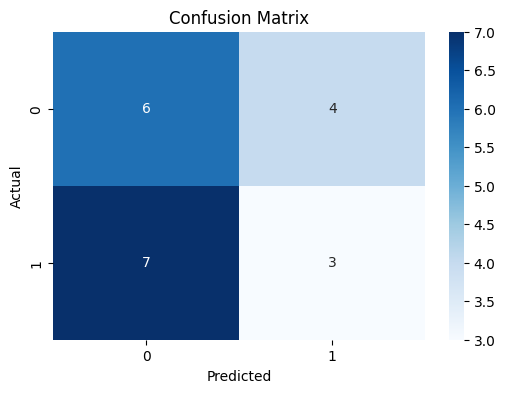

In [7]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
